## getting data and defining necessary modules

In [74]:
pip install torchsummary


Note: you may need to restart the kernel to use updated packages.


In [75]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [76]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torch.nn.functional as F
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary

import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from PIL import Image
from IPython.display import display
from tqdm import tqdm

In [77]:
#%pwd
os.getcwd()

'c:\\Users\\hp\\Desktop\\deeplearningproject\\artifacts\\02_25_2024_00_54_27\\data_ingestion\\chest_xray'

In [78]:
# changing the directory 
#os.chdir(r'../artifacts/02_25_2024_00_54_27/data_ingestion/chest_xray')

In [79]:
%pwd

'c:\\Users\\hp\\Desktop\\deeplearningproject\\artifacts\\02_25_2024_00_54_27\\data_ingestion\\chest_xray'

In [80]:
data_path=os.getcwd()

## Exploring the data or images

In [81]:
# Defining the class name 
class_name = ['NORMAL','PNEUMONIA']

In [82]:
# Creating a function to  get the list of files
def get_list_of_files(dir_name):
    '''
    input - The input directory location
    output - Returns the list the files in the directory
    '''
    files_list = os.listdir(dir_name)
    return files_list

In [83]:
##defining path for train normal data path
train_normal_dir = data_path+'/train/'+class_name[0]

In [84]:
## getting images from train_data_dir
files_list_normal_train = get_list_of_files(train_normal_dir)

In [85]:
files_list_normal_train

['NORMAL-1003233-0001.jpeg',
 'NORMAL-1012843-0001.jpeg',
 'NORMAL-1014768-0001.jpeg',
 'NORMAL-1023731-0001.jpeg',
 'NORMAL-1029510-0001.jpeg',
 'NORMAL-1031320-0001.jpeg',
 'NORMAL-1034239-0001.jpeg',
 'NORMAL-1041364-0001.jpeg',
 'NORMAL-1044645-0001.jpeg',
 'NORMAL-1055663-0001.jpeg',
 'NORMAL-1063934-0001.jpeg',
 'NORMAL-1064313-0001.jpeg',
 'NORMAL-1064313-0002.jpeg',
 'NORMAL-1068231-0001.jpeg',
 'NORMAL-1068326-0001.jpeg',
 'NORMAL-1070073-0001.jpeg',
 'NORMAL-1070073-0002.jpeg',
 'NORMAL-1080088-0001.jpeg',
 'NORMAL-1097039-0001.jpeg',
 'NORMAL-1101909-0001.jpeg',
 'NORMAL-1128157-0001.jpeg',
 'NORMAL-1140710-0001.jpeg',
 'NORMAL-1150393-0001.jpeg',
 'NORMAL-1156778-0001.jpeg',
 'NORMAL-1165014-0001.jpeg',
 'NORMAL-1165014-0002.jpeg',
 'NORMAL-1170804-0001.jpeg',
 'NORMAL-1177627-0001.jpeg',
 'NORMAL-1196989-0001.jpeg',
 'NORMAL-1203236-0001.jpeg',
 'NORMAL-1206638-0001.jpeg',
 'NORMAL-1241506-0001.jpeg',
 'NORMAL-1243491-0001.jpeg',
 'NORMAL-1261648-0001.jpeg',
 'NORMAL-13115

In [86]:
##defining path for train normal data path
train_pneumonia_dir = data_path+'/train/'+class_name[1]

In [87]:
files_list_pneumonia_train = get_list_of_files(data_path+'/train/'+class_name[1])

In [88]:
files_list_pneumonia_train

['BACTERIA-1008087-0001.jpeg',
 'BACTERIA-1025587-0001.jpeg',
 'BACTERIA-1027194-0001.jpeg',
 'BACTERIA-1033441-0001.jpeg',
 'BACTERIA-103798-0001.jpeg',
 'BACTERIA-103798-0002.jpeg',
 'BACTERIA-1039608-0001.jpeg',
 'BACTERIA-1040986-0001.jpeg',
 'BACTERIA-1041881-0001.jpeg',
 'BACTERIA-1041881-0002.jpeg',
 'BACTERIA-104960-0001.jpeg',
 'BACTERIA-1065620-0001.jpeg',
 'BACTERIA-1065620-0002.jpeg',
 'BACTERIA-1069837-0001.jpeg',
 'BACTERIA-1069837-0002.jpeg',
 'BACTERIA-1074715-0001.jpeg',
 'BACTERIA-1076722-0001.jpeg',
 'BACTERIA-1083680-0001.jpeg',
 'BACTERIA-1083680-0002.jpeg',
 'BACTERIA-1083680-0003.jpeg',
 'BACTERIA-1083680-0004.jpeg',
 'BACTERIA-1083680-0005.jpeg',
 'BACTERIA-1083680-0006.jpeg',
 'BACTERIA-1083680-0007.jpeg',
 'BACTERIA-1083680-0008.jpeg',
 'BACTERIA-1083680-0009.jpeg',
 'BACTERIA-1083680-0010.jpeg',
 'BACTERIA-1083680-0011.jpeg',
 'BACTERIA-1083680-0012.jpeg',
 'BACTERIA-1083680-0013.jpeg',
 'BACTERIA-1083680-0014.jpeg',
 'BACTERIA-1083680-0015.jpeg',
 'BACTERIA-

In [89]:
test_normal_dir = data_path+'/test/'+class_name[0]
test_pneumonia_dir = data_path+'/test/'+class_name[1]

In [90]:
files_list_normal_test = get_list_of_files(test_normal_dir)

In [91]:
files_list_pneumonia_test = get_list_of_files(test_pneumonia_dir)

In [92]:
print("Number of train samples in Normal category {}".format(len(files_list_normal_train)))
print("Number of train samples in Pneumonia category {}".format(len(files_list_pneumonia_train)))
print("Number of test samples in Normal category {}".format(len(files_list_normal_test)))
print("Number of test samples in Pneumonia category {}".format(len(files_list_pneumonia_test)))

Number of train samples in Normal category 1349
Number of train samples in Pneumonia category 3883
Number of test samples in Normal category 234
Number of test samples in Pneumonia category 390


In [93]:
rand_img_no = np.random.randint(0,len(files_list_normal_train))


(1604, 1836)


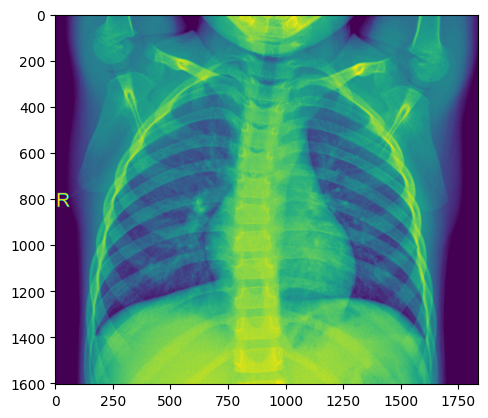

In [94]:
img = data_path + '/train/NORMAL/'+ files_list_normal_train[rand_img_no]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(688, 1128)


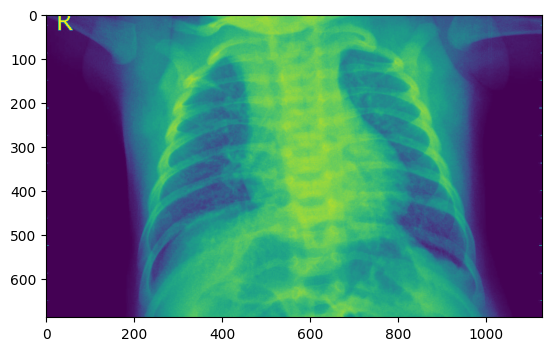

In [95]:
img = data_path + '/train/PNEUMONIA/'+ files_list_pneumonia_train[64]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(1352, 1562)


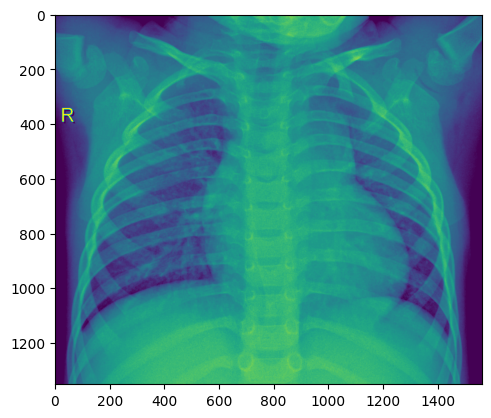

In [96]:
img = data_path + '/test/NORMAL/'+ files_list_normal_test[100]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

(752, 1032)


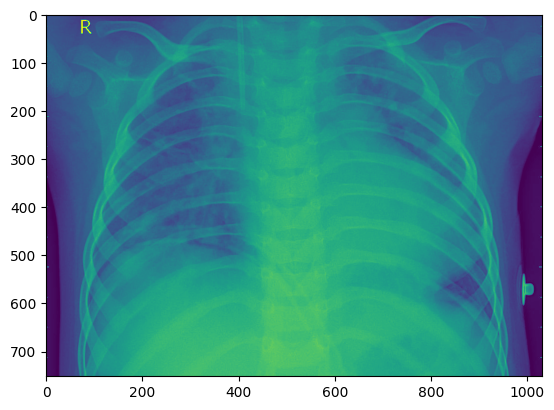

In [97]:
img = data_path + '/test/PNEUMONIA/'+ files_list_pneumonia_test[2]
print(plt.imread(img).shape)
img = mpimg.imread(img)
imgplot = plt.imshow(img)
plt.show()

## Transforming the Images

**Data Transformation Overview**

We need to perform transformation on both train and test images. For Training data, we need to perform data augmentation as well. Data Augmentation is done to create synthetic data.

**Transformation Steps**

In Transformation, we are applying the following operations:

- **Resize:**
  - Resize the input image to the given size.

- **CenterCrop:**
  - Crops the given image at the center.

- **ColorJitter:**
  - Randomly change the brightness, contrast, saturation, and hue of an image.

- **RandomHorizontalFlip:**
  - Horizontally flip the given image randomly with a given probability.

- **RandomRotation:**
  - Rotate the image by a specified angle.

- **ToTensor:**
  - Convert numpy.ndarray to tensor.

- **Normalize:**
  - Normalize a float tensor image with mean and standard deviation.

These transformations help in preparing the data for training machine learning models by ensuring consistency and providing augmented data for improved generalization.


In [98]:
#defining the image transformations to be applied to the images
train_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

In [99]:
#test transformations
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                          [0.229, 0.224, 0.225])
])

## Creating Data Loader



For our usecase will be using the default data loader for Pytorch.

- We will be creating 2 data loaders one for the training data and other for the test data.
- batch size is a hyperparameter which we can tweak according to our need and system configuration.
- We can provide Image shuffling True for training data and False for test data.
- Pin memory is used to transfer the loaded dataset from CPU to GPU.

In [100]:
train_data = datasets.ImageFolder(os.path.join(data_path, 'train'), transform= train_transform) 

In [101]:
train_data

Dataset ImageFolder
    Number of datapoints: 5232
    Root location: c:\Users\hp\Desktop\deeplearningproject\artifacts\02_25_2024_00_54_27\data_ingestion\chest_xray\train
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ColorJitter(brightness=[0.9, 1.1], contrast=[0.9, 1.1], saturation=[0.9, 1.1], hue=[-0.1, 0.1])
               RandomHorizontalFlip(p=0.5)
               RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [102]:
test_data = datasets.ImageFolder(os.path.join(data_path, 'test'), transform= test_transform)

In [103]:
test_data

Dataset ImageFolder
    Number of datapoints: 624
    Root location: c:\Users\hp\Desktop\deeplearningproject\artifacts\02_25_2024_00_54_27\data_ingestion\chest_xray\test
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [104]:
train_loader = DataLoader(train_data,
                          batch_size= 2, shuffle= True, pin_memory= True)

In [105]:
test_loader = DataLoader(test_data,
                         batch_size= 2, shuffle= False, pin_memory= True)

In [106]:
class_names = train_data.classes
print(class_names)
print(f'Number of train images: {len(train_data)}')
print(f'Number of test images: {len(test_data)}')

['NORMAL', 'PNEUMONIA']
Number of train images: 5232
Number of test images: 624


## Creating the model Architecture

- First Layer is the input layer consisting of 3 input channels and output channels with kernel_size of 3X3, padding=0 and bias=True. The activation function we are using is ReLU and performing batch normalization.
- Then we are performing max pooling to extract the important features out of the image.
- Similarly we are passing our model through 9 convolutional layers.
- Finally we are passing out passing our model through a output layer in which we are getting binary classification.

**Think of a Convolutional Block as a Detective:**

*Investigation (Convolution):*

- Imagine a detective looking at a crime scene (input image).

- The detective is trying to find important clues (features) to solve the case.
- Each convolutional layer is like the detective examining a specific part of the crime scene.

*Checking for Clues (ReLU Activation):*

- After looking at a part of the crime scene, the detective decides whether the clues found are important or not.
-ReLU activation is like the detective saying, "If a clue is useful, keep it; otherwise, ignore it."

*Organizing Clues (Batch Normalization):*

- The detective wants to keep things organized and consistent.
- Batch normalization is like the detective putting all the important clues in a neat and organized manner.

*Getting a Bigger Picture (MaxPooling):*

- Now, the detective wants to get a bigger picture of the crime scene.
- MaxPooling is like the detective stepping back and summarizing what was found in a specific area.

**Why MaxPooling After Every Convolution?**

**Seeing Different Perspectives:**

- Each convolutional layer looks at the crime scene from a different angle (captures different features).
MaxPooling helps the detective see a broader view after each close examination.
Making Information Manageable:

- Imagine if the detective took pictures of every small detail; it would be overwhelming.
MaxPooling helps reduce the information to the most important aspects, making the investigation more manageable.
Improving Detective Skills:

- By going through this process multiple times, the detective becomes more skilled at recognizing important clues and solving the case.

In [107]:
class Net(nn.Module):
    def __init__(self):
        """
        Creating custom CNN architecture for Image classification
        """
        super(Net, self).__init__()
        # Input Block
        self.convolution_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=8, kernel_size=(3, 3),
                      padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(8)
        )
        self.pooling11 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK 1
        self.convolution_block2 = nn.Sequential(
            nn.Conv2d(in_channels=8, out_channels=20, kernel_size=(3, 3),
                      padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.pooling22 = nn.MaxPool2d(2, 2)
        self.convolution_block3 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10),
        )
        self.pooling33 = nn.MaxPool2d(2, 2)
        # CONVOLUTION BLOCK 2
        self.convolution_block4 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(20)
        )
        self.convolution_block5 = nn.Sequential(
            nn.Conv2d(in_channels=20, out_channels=32, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(32),
        )
#         self.convblock6 = nn.Sequential(
#             nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(1, 1), padding='same', bias=True),
#             nn.ReLU(),
#             nn.BatchNorm2d(10),
#         )
        self.convolution_block6 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=10, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
#         self.convblock8 = nn.Sequential(
#             nn.Conv2d(in_channels=10, out_channels=32, kernel_size=(1, 1), padding='same', bias=True),
#             nn.ReLU(),
#             nn.BatchNorm2d(32)
#         )
        self.convolution_block7 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=10, kernel_size=(1, 1), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(10)
        )
        self.convolution_block8 = nn.Sequential(
            nn.Conv2d(in_channels=10, out_channels=14, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(14)
        )
        self.convolution_block9 = nn.Sequential(
            nn.Conv2d(in_channels=14, out_channels=16, kernel_size=(3, 3), padding=0, bias=True),
            nn.ReLU(),
            nn.BatchNorm2d(16)
        )
        # OUTPUT BLOCK
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=4)
        )
        self.convolution_block_out = nn.Sequential(
              nn.Conv2d(in_channels=16, out_channels=2, kernel_size=(4, 4), padding=0, bias=True),
        )
    def forward(self, x):
        x = self.convolution_block1(x)
        x = self.pooling11(x)
        x = self.convolution_block2(x)
        x = self.pooling22(x)
        x = self.convolution_block3(x)
        x = self.pooling33(x)
        x = self.convolution_block4(x)
        x = self.convolution_block5(x)
#         x = self.convblock6(x)
        x = self.convolution_block6(x)
#         x = self.convblock8(x)
        x = self.convolution_block7(x)
        x = self.convolution_block8(x)
        x = self.convolution_block9(x)
        x = self.gap(x)
        x = self.convolution_block_out(x)
        x = x.view(-1, 2)
        return F.log_softmax(x, dim=-1)

In [108]:
# To check weather cuda is available in the system or not 
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Available processor {}".format(device))
model = Net().to(device)
# To check the model summary
summary(model, input_size=(3, 224, 224))

Available processor cpu
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 222, 222]             224
              ReLU-2          [-1, 8, 222, 222]               0
       BatchNorm2d-3          [-1, 8, 222, 222]              16
         MaxPool2d-4          [-1, 8, 111, 111]               0
            Conv2d-5         [-1, 20, 109, 109]           1,460
              ReLU-6         [-1, 20, 109, 109]               0
       BatchNorm2d-7         [-1, 20, 109, 109]              40
         MaxPool2d-8           [-1, 20, 54, 54]               0
            Conv2d-9           [-1, 10, 54, 54]             210
             ReLU-10           [-1, 10, 54, 54]               0
      BatchNorm2d-11           [-1, 10, 54, 54]              20
        MaxPool2d-12           [-1, 10, 27, 27]               0
           Conv2d-13           [-1, 20, 25, 25]           1,820
             Re

In [109]:
train_losses = []
test_losses = []
train_acc = []
test_acc = []


In [110]:
def train(model, device, train_loader, optimizer, epoch):
    """
    Description: To train the model 
    
    input: model,device,train_loader,optimizer,epoch 
    
    output: loss, batch id and accuracy
    """
    model.train()
    pbar = tqdm(train_loader)
    correct = 0
    processed = 0
    for batch_idx, (data, target) in enumerate(pbar):
        # get data
        data, target = data.to(device), target.to(device)
        # Initialization of gradient
        optimizer.zero_grad()
        # In PyTorch, gradient is accumulated over backprop and even though thats used in RNN generally not used in CNN
        # or specific requirements
        ## prediction on data
        y_pred = model(data)
        # Calculating loss given the prediction
        loss = F.nll_loss(y_pred, target)
        train_losses.append(loss)
        # Backprop
        loss.backward()
        optimizer.step()
        # get the index of the log-probability corresponding to the max value
        pred = y_pred.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
        train_acc.append(100*correct/processed)

In [111]:
def test(model, device, test_loader):
    """
    Description: To test the model
    
    input: model, device, test_loader
    
    output: average loss and accuracy
    
    """
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
    test_acc.append(100. * correct / len(test_loader.dataset))

In [112]:
# Defining the params for training 
model =  Net().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.8)
scheduler = StepLR(optimizer, step_size=6, gamma=0.5)
EPOCHS = 1

In [113]:
#Training the model
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train(model, device, train_loader, optimizer, epoch)
    scheduler.step()
    print('current Learning Rate: ', optimizer.state_dict()["param_groups"][0]["lr"])
    test(model, device, test_loader)

EPOCH: 0


Loss=0.040712811052799225 Batch_id=2615 Accuracy=90.67: 100%|██████████| 2616/2616 [03:57<00:00, 11.00it/s]  


current Learning Rate:  0.01

Test set: Average loss: 0.5240, Accuracy: 508/624 (81.41%)



In [1]:
train_losses1 = [float(i.cpu().detach().numpy()) for i in train_losses]
train_acc1 = [i for i in train_acc]
test_losses1 = [i for i in test_losses]
test_acc1 = [i for i in test_acc]
fig, axs = plt.subplots(2,2,figsize=(16,10))
axs[0, 0].plot(train_losses1)
axs[0, 0].set_title("Training Loss")

axs[1, 0].plot(train_acc1)
axs[1, 0].set_title("Training Accuracy")

axs[0, 1].barplot(test_losses1)
axs[0, 1].set_title("Test Loss")

axs[1, 1].plot(test_acc1)
axs[1, 1].set_title("Test Accuracy")



NameError: name 'train_losses' is not defined

In [118]:
print("Test Losses:", test_losses1)
print("Test Accuracy:", test_acc1)


Test Losses: [0.5239745680162462]
Test Accuracy: [81.41025641025641]


In [119]:
test_losses1

[0.5239745680162462]

In [120]:
test_losses

[0.5239745680162462]

In [121]:
test_acc

[81.41025641025641]

In [122]:
test_acc1

[81.41025641025641]